In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = sns.load_dataset('mpg')

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
df.shape

(398, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [30]:
df.name.nunique()

305

In [31]:
df.drop('name', axis=1, inplace=True)

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [33]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [36]:
from datetime import datetime

In [37]:
datetime.today().year

2020

In [38]:
df['age'] = datetime.today().year - (1900 + df.model_year)

In [39]:
df.age

0      50
1      50
2      50
3      50
4      50
       ..
393    38
394    38
395    38
396    38
397    38
Name: age, Length: 392, dtype: int64

In [40]:
df.drop('model_year', axis=1, inplace=True)

In [41]:
df_dropfirst = pd.get_dummies(df, drop_first=True)

In [42]:
df = df = pd.get_dummies(df)

In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,0,1


In [44]:
df_dropfirst.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   age            392 non-null    int64  
 7   origin_europe  392 non-null    uint8  
 8   origin_japan   392 non-null    uint8  
 9   origin_usa     392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 25.6 KB


In [46]:
df_dropfirst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [47]:
X = df.drop(['mpg'], axis=1)
y = df.mpg

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = lm.predict(X_test)

In [53]:
eval_metrics(y_test, y_pred)

r2_score: 0.8067829757820248 
 mae: 2.5295843491986876 
 mse: 10.44380980014742 
 rmse: 3.2316883822775084


In [54]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [55]:
compare

,Actual,Pred
79,26.0,27.300845
276,21.6,26.817916
248,36.1,34.385421
56,26.0,25.338111
393,27.0,28.091061
...,...,...
104,12.0,9.305101
82,23.0,24.875298
220,33.5,32.390619
236,25.5,24.592590


In [56]:
X = df_dropfirst.drop(['mpg'], axis=1)
y = df_dropfirst.mpg

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = lm.predict(X_test)

In [60]:
eval_metrics(y_test, y_pred)

r2_score: 0.8067829757820253 
 mae: 2.5295843491986836 
 mse: 10.443809800147397 
 rmse: 3.231688382277505


In [61]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [62]:
compare

,Actual,Pred
79,26.0,27.300845
276,21.6,26.817916
248,36.1,34.385421
56,26.0,25.338111
393,27.0,28.091061
...,...,...
104,12.0,9.305101
82,23.0,24.875298
220,33.5,32.390619
236,25.5,24.592590


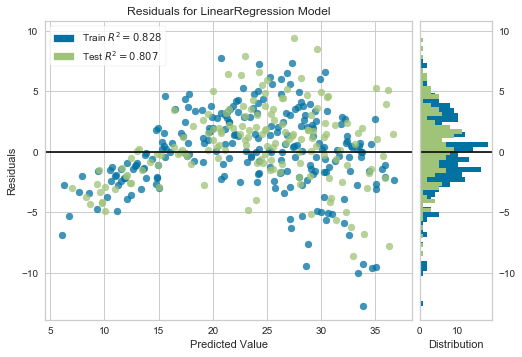

In [66]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
model = lm
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

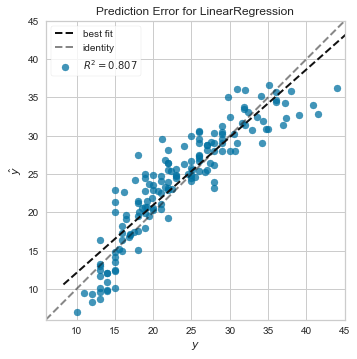

In [67]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figu

In [194]:
df = pd.read_csv('adver.txt')

In [116]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


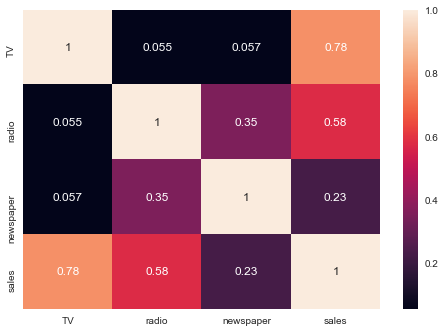

In [119]:
sns.heatmap(df.corr(), annot=True)

In [195]:
X = df.drop(['sales'], axis=1)
y = df.sales

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
y_pred = lm.predict(X_test)

In [134]:
eval_metrics(y_test, y_pred)

r2_score: 0.899438024100912 
 mae: 1.4607567168117606 
 mse: 3.1740973539761046 
 rmse: 1.7815996615334502


In [135]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [136]:
compare

,Actual,Pred
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


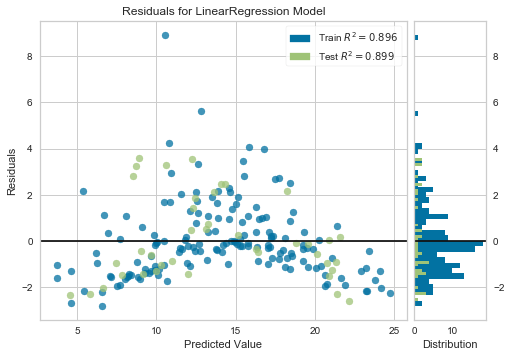

In [137]:
model = lm
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [138]:
pd.DataFrame(lm.coef_, X.columns, columns=['coeff'])

,coeff
TV,0.044730
radio,0.189195
newspaper,0.002761


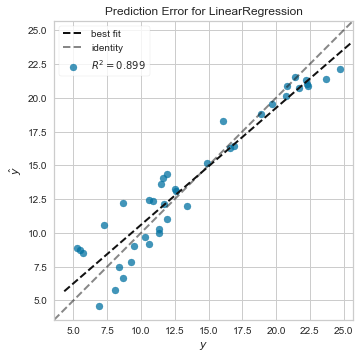

In [139]:
model = lm
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figu

In [141]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X, y=y, cv=10)
accuraries.mean()

0.8853562237979616

In [71]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [44]:
from sklearn.preprocessing import StandardScaler

In [49]:
alpha_space = np.linspace(0.1,20,100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)

In [147]:
scale = StandardScaler()

In [149]:
X_train = scale.fit_transform(X_train)

In [150]:
X_test = scale.fit_transform(X_test)

In [151]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [152]:
ridgecv.alpha_

7.135353535353534

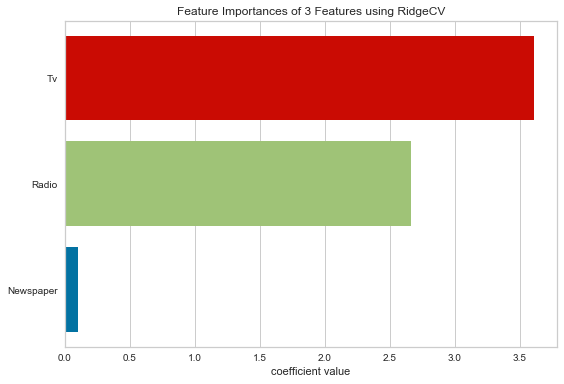

In [155]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridgecv, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [156]:
ridge_model = Ridge(ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8786175405996415 
 mae: 1.5070754681125629 
 mse: 3.8312666368887855 
 rmse: 1.9573621629347966


In [157]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [159]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7918053821655081 
 mae: 2.063005533388255 
 mse: 6.571370338264407 
 rmse: 2.5634684195956865


In [160]:
lasso_model = Lasso()

In [161]:
accuraries = cross_val_score(estimator=lasso_model, X=X, y=y, cv=10)
accuraries.mean()

0.8861588573668113

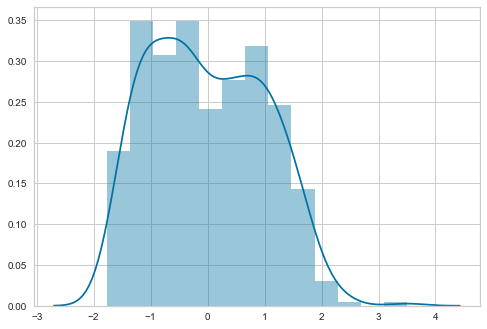

In [167]:
sns.distplot(X_train)

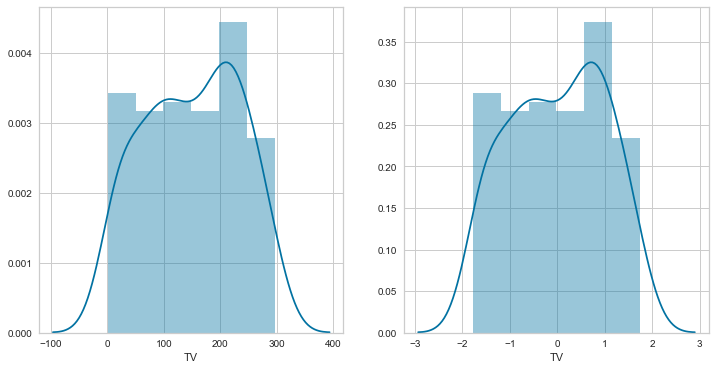

In [199]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_train['TV'], ax=ax1)
X_train_scale = scale.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=['TV', 'Radio', 'Newspaper'])
sns.distplot(X_train_scale['TV'], ax=ax2)

In [172]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [188]:
X_train = scale.fit_transform(X_train)

In [189]:
X_train = pd.DataFrame(X_train, columns=['TV', 'Radio', 'Newspaper'])

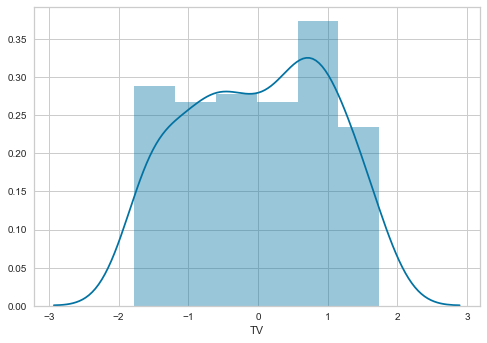

In [190]:
sns.distplot(X_train['TV'])

In [200]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 9)

In [201]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [202]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [203]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [204]:
lm = LinearRegression()

In [205]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
y_pred = lm.predict(X_test)

In [207]:
eval_metrics(y_test, y_pred)

r2_score: 0.9869181490609605 
 mae: 0.5261794444043737 
 mse: 0.4129102285378964 
 rmse: 0.6425809120553585


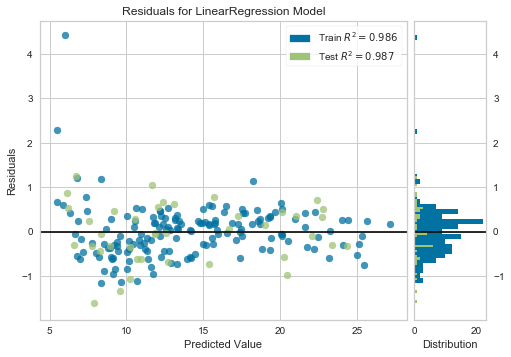

In [209]:
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

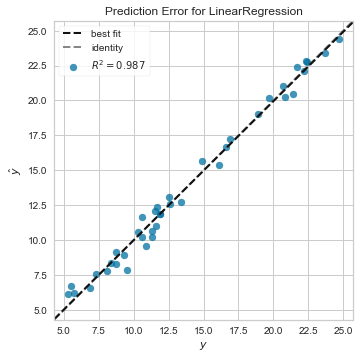

In [210]:
model = lm
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figu

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
162,16.21,2.00,Female,No,Sun,Dinner,3
195,7.56,1.44,Male,No,Thur,Lunch,2
112,38.07,4.00,Male,No,Sun,Dinner,3
39,31.27,5.00,Male,No,Sat,Dinner,3
26,13.37,2.00,Male,No,Sat,Dinner,2
133,12.26,2.00,Female,No,Thur,Lunch,2
65,20.08,3.15,Male,No,Sat,Dinner,3
0,16.99,1.01,Female,No,Sun,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
151,13.13,2.00,Male,No,Sun,Dinner,2


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
tips.drop(columns=['smoker', 'day', 'time'], inplace=True)

In [8]:
tips

,total_bill,tip,sex,size
0,16.99,1.01,Female,2
1,10.34,1.66,Male,3
2,21.01,3.50,Male,3
3,23.68,3.31,Male,2
4,24.59,3.61,Female,4
...,...,...,...,...
239,29.03,5.92,Male,3
240,27.18,2.00,Female,2
241,22.67,2.00,Male,2
242,17.82,1.75,Male,2


In [11]:
tips = pd.get_dummies(tips, drop_first=True)

In [12]:
tips

,total_bill,tip,size,sex_Female
0,16.99,1.01,2,1
1,10.34,1.66,3,0
2,21.01,3.50,3,0
3,23.68,3.31,2,0
4,24.59,3.61,4,1
...,...,...,...,...
239,29.03,5.92,3,0
240,27.18,2.00,2,1
241,22.67,2.00,2,0
242,17.82,1.75,2,0


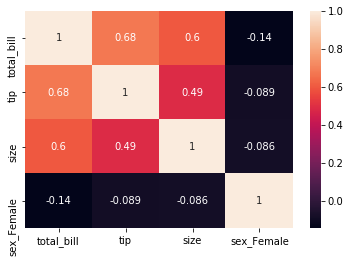

In [13]:
sns.heatmap(tips.corr(), annot=True)

In [133]:
X= tips.drop(['tip'], axis=1)
y=tips['tip']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = lm.predict(X_test)

In [20]:
eval_metrics(y_test, y_pred)

r2_score: 0.4792377144147404 
 mae: 0.6646233985387573 
 mse: 0.6509379346803467 
 rmse: 0.8068072475383118


In [21]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [22]:
compare

,Actual,Pred
24,3.18,2.907449
6,2.00,1.905206
153,2.00,3.866529
211,5.16,3.988067
198,2.00,2.266075
176,2.00,2.732397
192,2.56,3.689290
124,2.52,2.218911
9,3.23,2.450318
101,3.00,2.481943


In [23]:
pd.DataFrame(lm.coef_, X.columns, columns=['coef'])

,coef
total_bill,0.090701
size,0.265032
sex_Female,-0.022795


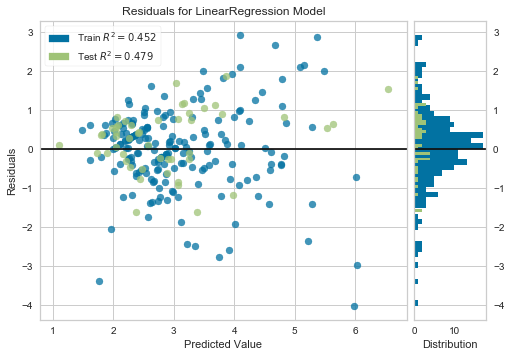

In [24]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
model = lm
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

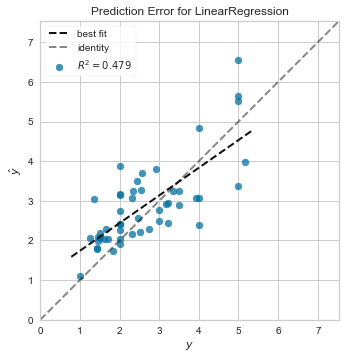

In [25]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [41]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X, y=y, cv=10)
accuraries.mean()

0.35372235112912653

In [33]:
accuraries

array([ 0.62475376,  0.52701726,  0.48402453,  0.67505423,  0.63653404,
        0.52176543, -0.43983608,  0.55205914,  0.7410762 ,  0.42400027,
        0.33795889, -0.30671696,  0.20290917,  0.59847463,  0.02009529])

In [42]:
lm.coef_

array([ 0.09070073,  0.2650324 , -0.02279527])

In [72]:
scale = StandardScaler()

In [125]:
X_train = scale.fit_transform(X_train)

In [126]:
X_test = scale.transform(X_test)

In [76]:
ridge_model=Ridge(3).fit(X_train, y_train)

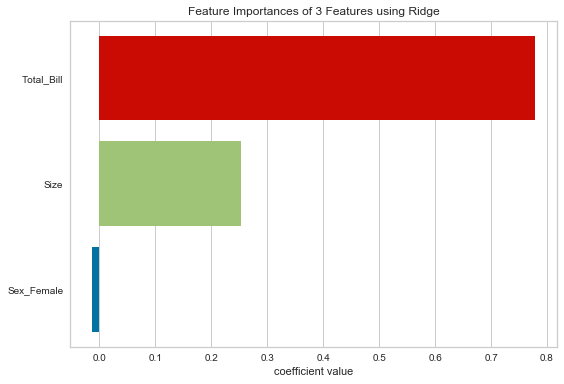

In [77]:
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [80]:
ridge_model = Ridge(3).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.47942203344737855 
 mae: 0.6654565523195948 
 mse: 0.6507075411711606 
 rmse: 0.8066644538909351


In [81]:
ridge_model.alpha

3

In [82]:
alpha_space = np.linspace(0.1,20,100)


In [84]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [85]:
ridgecv.alpha_

20.0

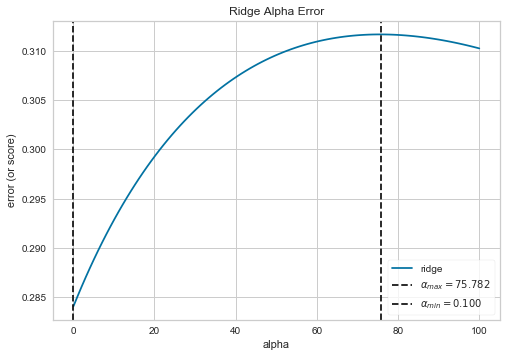

In [90]:
from yellowbrick.regressor import ManualAlphaSelection

alpha_space = np.linspace(0.1,100,100)

visualizer = ManualAlphaSelection(
        Ridge(), 
        alphas=alpha_space,
        cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [127]:
ridge_model = Ridge(75.782).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.46249107640188614 
 mae: 0.6883140136383502 
 mse: 0.6718707523260707 
 rmse: 0.819677224476849


In [128]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [129]:
compare

,Actual,Pred
24,3.18,2.917564
6,2.00,2.211122
153,2.00,3.802589
211,5.16,3.888257
198,2.00,2.416991
176,2.00,2.794176
192,2.56,3.468653
124,2.52,2.383747
9,3.23,2.595350
101,3.00,2.569148


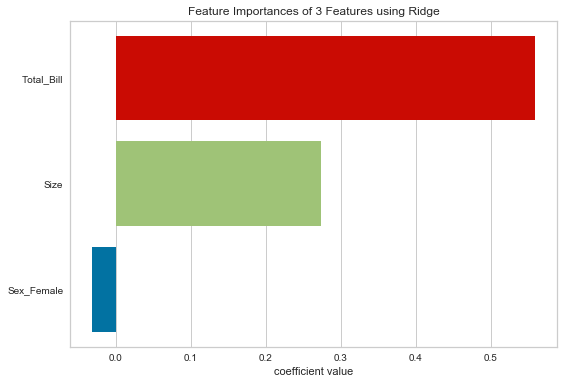

In [130]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [131]:
lm.coef_

array([ 0.09070073,  0.2650324 , -0.02279527])

In [132]:
ridge_model.coef_

array([ 0.5592716,  0.2733343, -0.0307672])

In [98]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [107]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5467115210170848 
 mae: 0.6256100264339349 
 mse: 0.5665976098709373 
 rmse: 0.7527267830168775


In [108]:
lasso_model.alpha

1.0

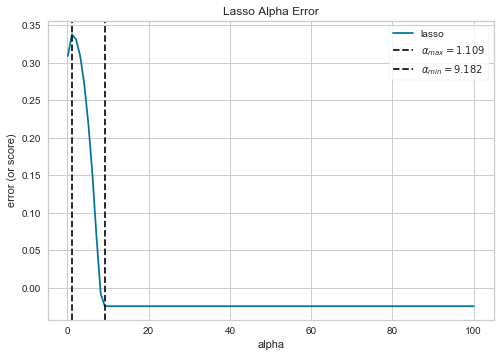

In [115]:
alpha_space = np.linspace(0.1,100,100)

visualizer = ManualAlphaSelection(
        Lasso(), 
        alphas=alpha_space,
        cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [116]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=10).fit(X_train, y_train)

In [117]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5273068720881757 
 mae: 0.6374841046500827 
 mse: 0.5908528649971522 
 rmse: 0.7686695421292249


In [135]:
lasso_model = Lasso(alpha=1.109)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5454283784912746 
 mae: 0.6267361404874394 
 mse: 0.5682015012601009 
 rmse: 0.7537914176084131


In [136]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [137]:
#after scaling
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -0.15896098636013822 
 mae: 1.047104133961277 
 mse: 1.4486680232392768 
 rmse: 1.2036062575607012


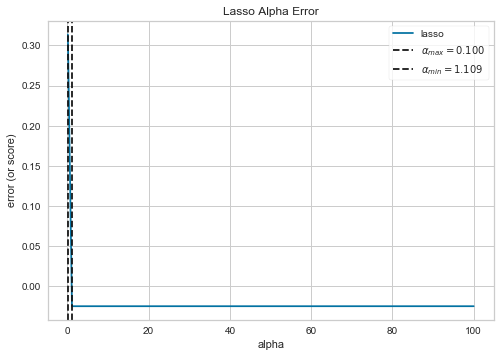

In [138]:
alpha_space = np.linspace(0.1,100,100)

visualizer = ManualAlphaSelection(
        Lasso(), 
        alphas=alpha_space,
        cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [139]:
lasso_model = Lasso(0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5102211622875712 
 mae: 0.6548094795721159 
 mse: 0.6122095126615545 
 rmse: 0.7824381845625599


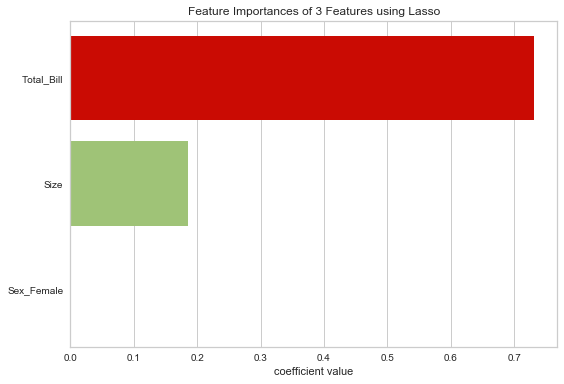

In [140]:
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

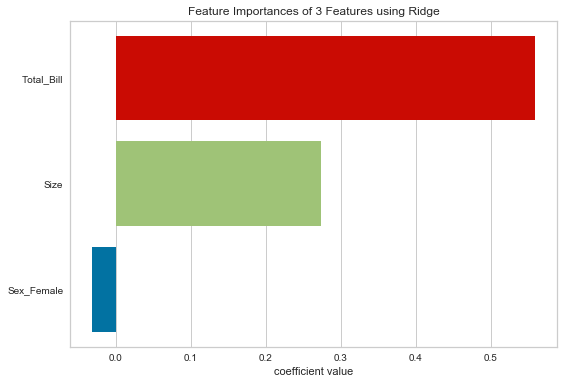

In [142]:
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

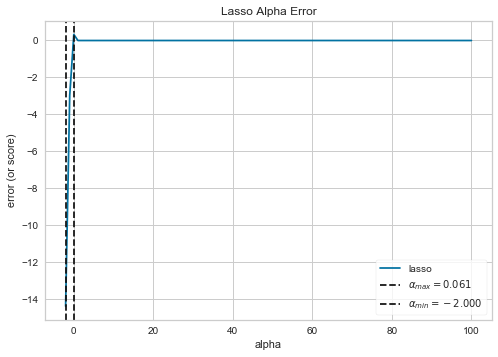

In [144]:
alpha_space = np.linspace(-2,100,100)

visualizer = ManualAlphaSelection(
        Lasso(), 
        alphas=alpha_space,
        cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [145]:
lasso_model = Lasso(0.061)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5018994762882849 
 mae: 0.656618551444697 
 mse: 0.6226113817050202 
 rmse: 0.7890572740334001


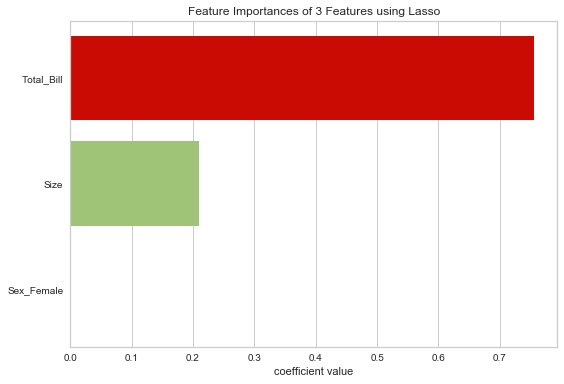

In [146]:
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [148]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1,.5,.7,.9,.95,.99,1])

In [149]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([-2.00000000e+00, -9.69696970e-01,  6.06060606e-02,  1.09090909e+00,
        2.12121212e+00,  3.15151515e+00,  4.18181818e+00,  5.21212121e+00,
        6.24242424e+00,  7.27272727e+00,  8.30303030e+00,  9.33333333e+00,
        1.03636364e+01,  1.13939394e+01,  1.24242424e+01,  1.34545455e+01,
        1.44848485e+01,  1.55151515e+01,  1.65454545e+01,  1.75757576e+01,
        1.86060606e+01,  1.9636...
        9.27878788e+01,  9.38181818e+01,  9.48484848e+01,  9.58787879e+01,
        9.69090909e+01,  9.79393939e+01,  9.89696970e+01,  1.00000000e+02]),
             copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [150]:
elastic_model.l1_ratio_

0.1

In [151]:
elastic_model.alpha_

0.06060606060606055

In [152]:
y_pred = elastic_model.predict(X_test)

In [153]:
eval_metrics(y_test,y_pred)

r2_score: 0.482341021316386 
 mae: 0.6659800649781871 
 mse: 0.6470588899777023 
 rmse: 0.8043997078428748


In [154]:
accuraries = cross_val_score(estimator=elastic_model, X=X_train, y=y_train, cv=10)

In [155]:
accuraries.mean()

0.29455177197055027

In [156]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(244, 9)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [158]:
model = LinearRegression()

In [159]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
y_pred = model.predict(X_test)

In [161]:
eval_metrics(y_test,y_pred)

r2_score: 0.38100442717204686 
 mae: 0.7074389398172937 
 mse: 0.7737267288856658 
 rmse: 0.8796173764118498


In [162]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

In [163]:
accuraries.mean()

0.1976530255071452

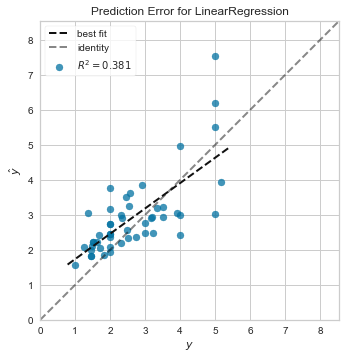

In [164]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [212]:
tit = sns.load_dataset('titanic')

In [213]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [214]:
tit.drop(['who', 'deck', 'alone'], axis=1, inplace=True)

In [215]:
tit.drop(['embark_town'], axis=1, inplace=True)

In [216]:
tit.drop(['alive'], axis=1, inplace=True)

In [217]:
tit.drop(['adult_male'], axis=1, inplace=True)

In [218]:
tit = pd.get_dummies(tit, drop_first=True)

In [189]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   age           714 non-null    float64
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   sex_male      891 non-null    uint8  
 7   embarked_Q    891 non-null    uint8  
 8   embarked_S    891 non-null    uint8  
 9   class_Second  891 non-null    uint8  
 10  class_Third   891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [195]:
tit

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,0,0
888,0,3,NaN,1,2,23.4500,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0,0


In [190]:
tit.isnull().sum()

survived          0
pclass            0
age             177
sibsp             0
parch             0
fare              0
sex_male          0
embarked_Q        0
embarked_S        0
class_Second      0
class_Third       0
dtype: int64

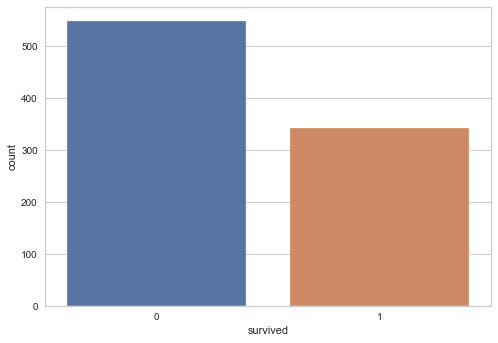

In [192]:
sns.set_style("whitegrid")
sns.countplot(x="survived",data=tit,palette="deep")

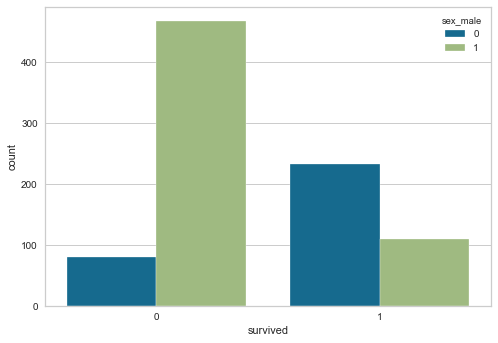

In [193]:
sns.countplot(x='survived', hue='sex_male', data=tit)

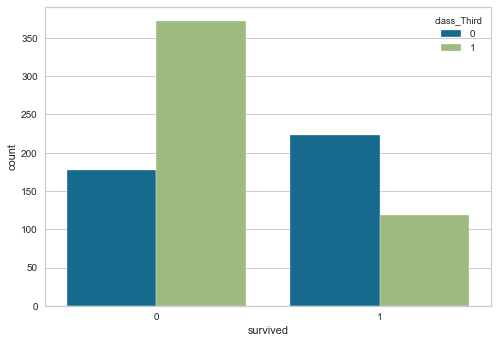

In [194]:
sns.countplot(x='survived', hue='class_Third', data=tit)

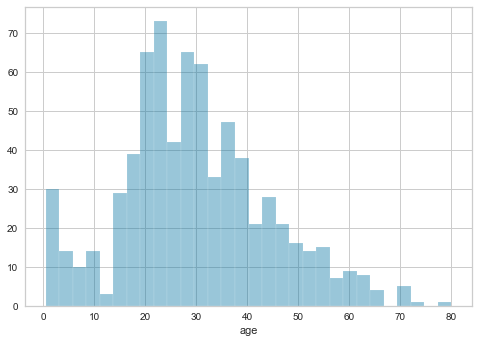

In [197]:
sns.distplot(tit.age.dropna(), bins=30, kde = False)

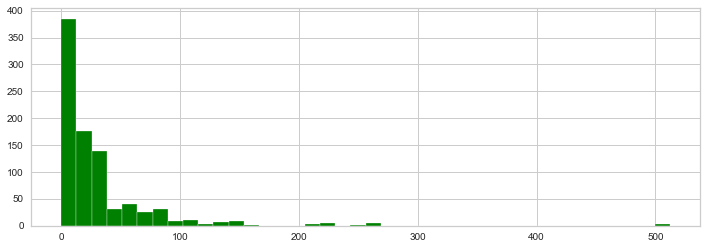

In [199]:
tit.fare.hist(color='green', bins=40, figsize=(12,4))

In [200]:
tit.corr()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660,0.093349,-0.322308
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720,-0.188432,0.916673
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523,0.006954,-0.312271
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941,-0.055932,0.092548
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036,-0.000734,0.015790
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603,-0.118557,-0.413333
sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722,-0.064746,0.137143
embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624,-0.127301,0.237449
embarked_S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000,0.192061,-0.009511
class_Second,0.093349,-0.188432,0.006954,-0.055932,-0.000734,-0.118557,-0.064746,-0.127301,0.192061,1.000000,-0.565210


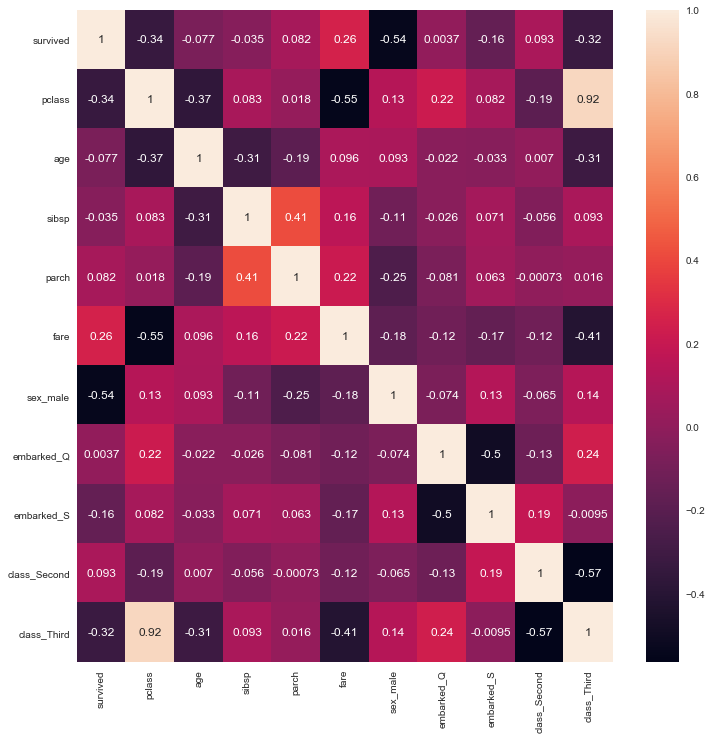

In [204]:
plt.figure(figsize=(12,12))
sns.heatmap(tit.corr(), annot=True)

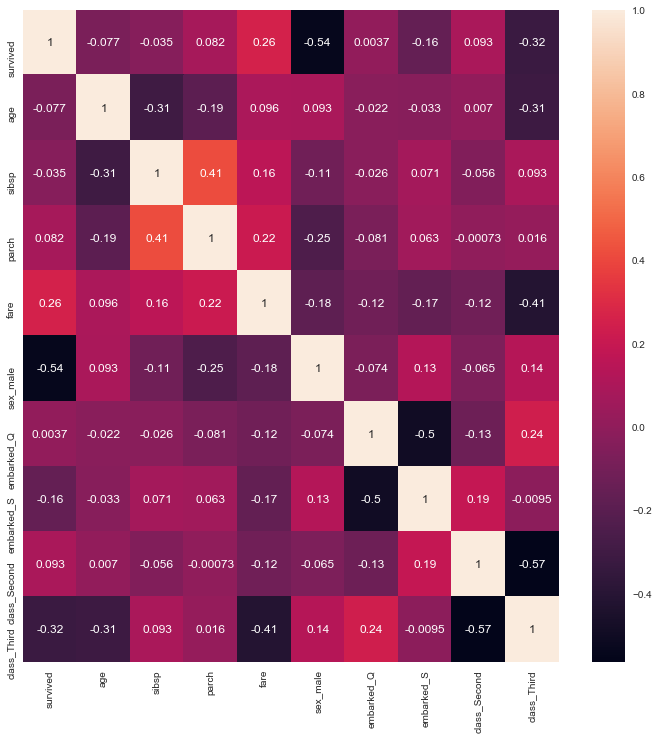

In [206]:
plt.figure(figsize=(12,12))
sns.heatmap(tit.corr(), annot=True)

In [207]:
tit.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [219]:
tit.drop(['class_Second', 'class_Third'], axis=1, inplace=True)

In [220]:
tit.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [221]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [224]:
tit['age'] = tit[['age','pclass']].apply(impute_age,axis=1)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
X = tit.drop('survived',axis=1)
y = tit['survived']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)

In [228]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
model.score(X_test,y_test)

0.8116591928251121

In [230]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())
print(scores)

Cross-Validation Accuracy Scores 0.8110671936758894
[0.91304348 0.73913043 0.91304348 0.81818182 0.77272727 0.81818182
 0.77272727 0.77272727 0.81818182 0.77272727]


In [231]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [233]:
y_pred = model.predict(X_test)

In [234]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.78      0.73      0.76        89

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



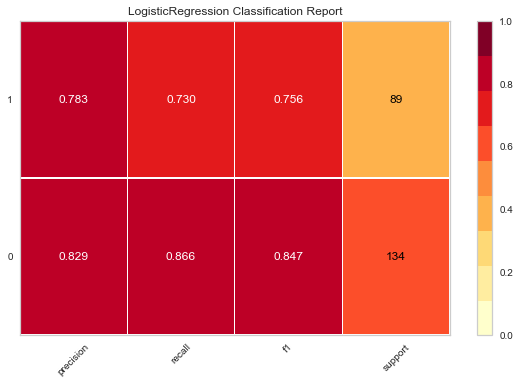

In [235]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [236]:
confusion_matrix(y_pred,y_test)

array([[116,  24],
       [ 18,  65]])

In [238]:
from sklearn.datasets import load_breast_cancer

In [241]:
cancer = load_breast_cancer()

In [242]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [243]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [251]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [252]:
df_target = pd.DataFrame(cancer['target'], columns=['canver'])

In [253]:
df_target

,canver
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


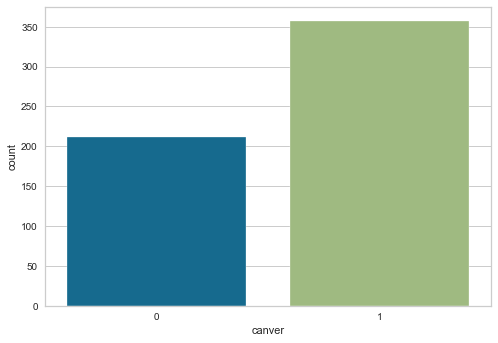

In [254]:
sns.countplot(df_target['canver'])

In [256]:
frame = [df, df_target]
result = pd.concat(frame, axis=1)
result

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,canver
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


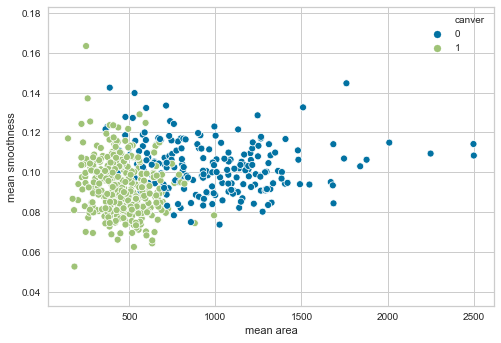

In [258]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='canver', data=result)

In [259]:
X=df
y=df_target

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [261]:
from sklearn.svm import SVC

In [262]:
model = SVC()

In [263]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [265]:
y_pred = model.predict(X_test)

In [266]:
confusion_matrix(y_test,y_pred)

array([[ 56,  10],
       [  3, 102]])

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [269]:
sc = StandardScaler()

In [270]:
X_train_s = sc.fit_transform(X_train)

In [271]:
X_test_s = sc.transform(X_test)

In [272]:
model_s = SVC().fit(X_train_s, y_train)

In [274]:
y_pred = model_s.predict(X_test_s)

In [275]:
confusion_matrix(y_test,y_pred)

array([[ 64,   2],
       [  1, 104]])

In [276]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.99       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 29.5, 'Predicted Label')

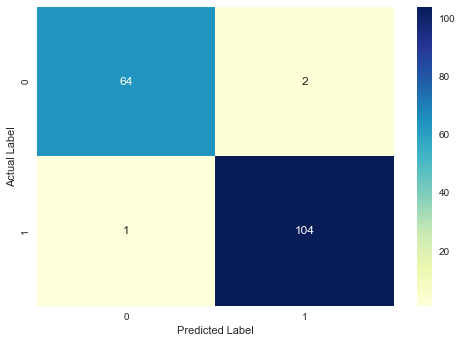

In [277]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [278]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [279]:
from sklearn.model_selection import GridSearchCV

In [282]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, refit=True)

In [283]:
grid.fit(X_train_s,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.709, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [284]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [285]:
y_pred = grid.predict(X_test_s)

In [286]:
confusion_matrix(y_test,y_pred)

array([[ 60,   6],
       [  0, 105]])

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        66
           1       0.95      1.00      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



Text(0.5, 29.5, 'Predicted Label')

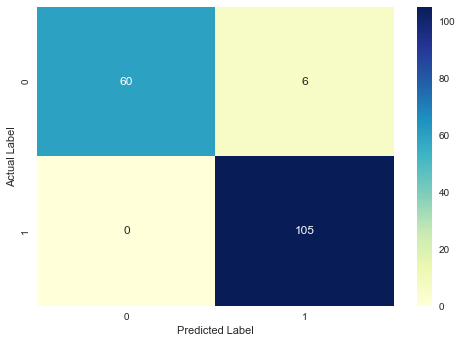

In [288]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [291]:
df_knn = pd.read_csv('Classified Data', index_col=0)

In [292]:
df_knn

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [293]:
df_knn.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [294]:
scaller = StandardScaler()

In [296]:
scaller.fit(df_knn.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [297]:
scaled_x = scaller.transform(df_knn.drop('TARGET CLASS', axis=1))

In [298]:
df_scalledx = pd.DataFrame(scaled_x, columns=df_knn.columns[:-1])

In [299]:
df_scalledx

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [300]:
X= df_scalledx
y= df_knn['TARGET CLASS']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [302]:
from sklearn.neighbors import KNeighborsClassifier

In [303]:
model = KNeighborsClassifier(n_neighbors=1)

In [304]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [305]:
y_pred = model.predict(X_test)

In [306]:
confusion_matrix(y_test, y_pred)

array([[134,   8],
       [ 11, 147]])

In [308]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [311]:
error_rate = []
for  i in range(1,40):
        
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))
        

Text(0, 0.5, 'Error rate')

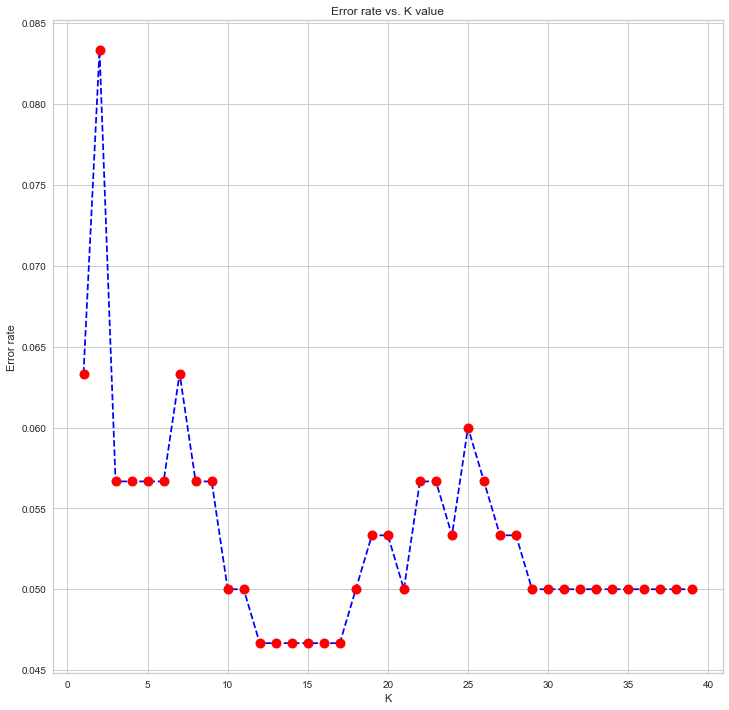

In [313]:
plt.figure(figsize=(12,12))
plt.plot(range(1,40), error_rate, color='blue', linestyle ='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [314]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[136   6]
 [  8 150]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [315]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[134   8]
 [  9 149]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       142
           1       0.95      0.94      0.95       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [409]:
df_knn = pd.read_pickle('saved_df.pkl')

In [317]:
df_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [319]:
df_knn.shape

(707, 9)

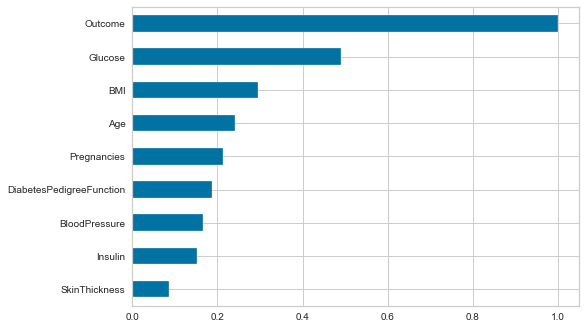

In [322]:
df_knn.corr()['Outcome'].sort_values().plot.barh()

In [326]:
X = df_knn.drop(['Outcome'], axis=1)
y = df_knn['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [327]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  16]
 [ 34  42]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.72      0.55      0.63        76

    accuracy                           0.77       213
   macro avg       0.75      0.72      0.73       213
weighted avg       0.76      0.77      0.76       213



***before scaling***

In [328]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106  31]
 [ 39  37]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       137
           1       0.54      0.49      0.51        76

    accuracy                           0.67       213
   macro avg       0.64      0.63      0.63       213
weighted avg       0.66      0.67      0.67       213



In [330]:
error_rate = []
for  i in range(1,40):
        
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error rate')

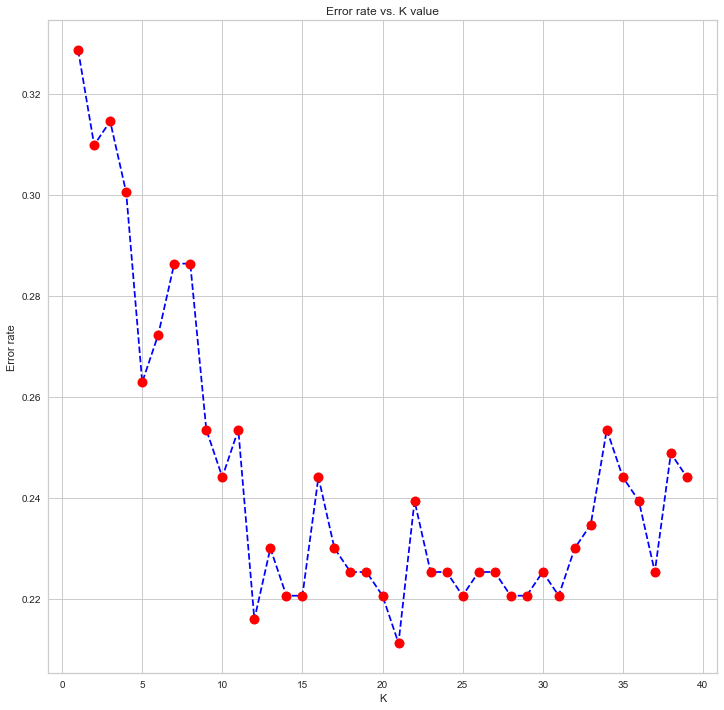

In [331]:
plt.figure(figsize=(12,12))
plt.plot(range(1,40), error_rate, color='blue', linestyle ='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [333]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[128   9]
 [ 37  39]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       137
           1       0.81      0.51      0.63        76

    accuracy                           0.78       213
   macro avg       0.79      0.72      0.74       213
weighted avg       0.79      0.78      0.77       213



***after scaling***

In [335]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [336]:
a = pd.DataFrame(X_train_s, columns=X_train.columns)

In [337]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [339]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[112  25]
 [ 34  42]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       137
           1       0.63      0.55      0.59        76

    accuracy                           0.72       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.72      0.72      0.72       213



In [340]:
error_rate = []
for  i in range(1,40):
        
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_s, y_train)
    y_pred_i = model.predict(X_test_s)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error rate')

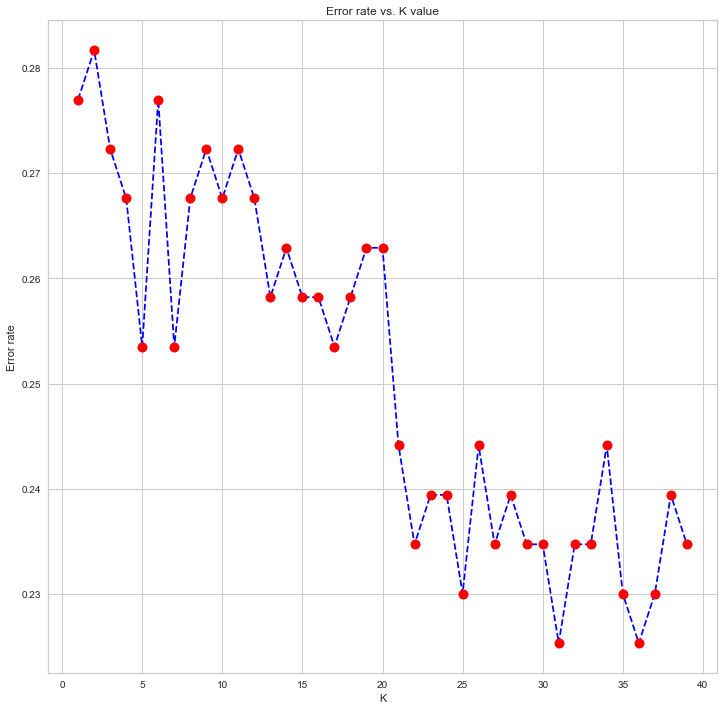

In [341]:
plt.figure(figsize=(12,12))
plt.plot(range(1,40), error_rate, color='blue', linestyle ='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [342]:
model = KNeighborsClassifier(n_neighbors=31)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[125  12]
 [ 36  40]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       137
           1       0.77      0.53      0.62        76

    accuracy                           0.77       213
   macro avg       0.77      0.72      0.73       213
weighted avg       0.77      0.77      0.76       213



In [354]:
knn = KNeighborsClassifier()

In [345]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [348]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [349]:
knn = GridSearchCV(knn, knn_params, cv=10).fit(X_train_s,y_train)

In [350]:
knn.best_params_

{'n_neighbors': 15}

In [351]:
knn_tunes = KNeighborsClassifier(n_neighbors=15).fit(X_train_s, y_train)

In [352]:
y_pred = knn.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  16]
 [ 39  37]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       137
           1       0.70      0.49      0.57        76

    accuracy                           0.74       213
   macro avg       0.73      0.69      0.69       213
weighted avg       0.74      0.74      0.73       213



In [355]:
knn_cv = GridSearchCV(knn, knn_params, scoring ='recall',cv=10).fit(X_train_s,y_train)

In [356]:
knn_cv.best_params_

{'n_neighbors': 3}

In [359]:
knn_tunes = KNeighborsClassifier(n_neighbors=3).fit(X_train_s, y_train)
y_pred = knn_cv.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  21]
 [ 37  39]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       137
           1       0.65      0.51      0.57        76

    accuracy                           0.73       213
   macro avg       0.70      0.68      0.69       213
weighted avg       0.72      0.73      0.72       213



In [361]:
X=df_knn.drop(["Outcome"], axis=1)
y=df_knn["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [364]:
import pickle
pickle.dump(log_model, open('knn_model', 'wb'))

In [365]:
model = pickle.load(open('knn_model', 'rb'))

In [366]:
my_dict={'Pregnancies':10,
        'Glucose':180,
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38,
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [367]:
prediction = model.predict(X)

In [368]:
prediction 

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [369]:
df_knn['pred'] = prediction

In [370]:
df_knn.sample(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred
745,12,100,84,33,105,30.0,0.488,46,0,0
558,11,103,68,40,0,46.2,0.126,42,0,1
34,10,122,78,31,0,27.6,0.512,45,0,1
69,4,146,85,27,100,28.9,0.189,27,0,0
5,5,116,74,0,0,25.6,0.201,30,0,0
216,5,109,62,41,129,35.8,0.514,25,1,0
296,2,146,70,38,360,28.0,0.337,29,1,0
314,7,109,80,31,0,35.9,1.127,43,1,1
615,3,106,72,0,0,25.8,0.207,27,0,0
161,7,102,74,40,105,37.2,0.204,45,0,0


In [371]:
prediction_pro = model.predict_proba(X)

In [375]:
prediction_pro

array([[0.32314036, 0.67685964],
       [0.92282449, 0.07717551],
       [0.11453168, 0.88546832],
       ...,
       [0.8028262 , 0.1971738 ],
       [0.74936889, 0.25063111],
       [0.90252618, 0.09747382]])

In [373]:
df_knn['pred_pro'] = prediction_pro[:,1]

In [374]:
df_knn.sample(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_pro
133,8,84,74,31,0,38.3,0.457,39,0,0,0.374263
550,1,116,70,28,0,27.4,0.204,21,0,0,0.108867
180,6,87,80,0,0,23.2,0.084,32,0,0,0.068218
740,11,120,80,37,150,42.3,0.785,48,1,1,0.824799
70,2,100,66,20,90,32.9,0.867,28,1,0,0.432793
282,7,133,88,15,155,32.4,0.262,37,0,0,0.297561
273,1,71,78,50,45,33.2,0.422,21,0,0,0.063704
389,3,100,68,23,81,31.6,0.949,28,0,0,0.497571
603,7,150,78,29,126,35.2,0.692,54,1,1,0.715948
209,7,184,84,33,0,35.5,0.355,41,1,1,0.718401


In [376]:
df_sample = pd.DataFrame([my_dict])

In [377]:
single_pred = model.predict(df_sample)

In [378]:
single_pred


array([1])

In [379]:
single_pred_pro = model.predict_proba(df_sample)

In [380]:
single_pred_pro

array([[0.20676496, 0.79323504]])

In [382]:
dtree = pd.read_csv('kyphosis.csv')

In [383]:
dtree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [384]:
dtree.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


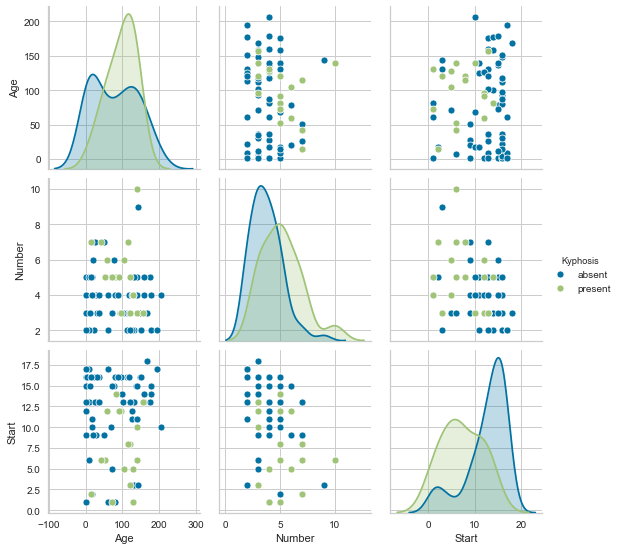

In [385]:
sns.pairplot(dtree, hue ='Kyphosis')

In [386]:
X= dtree.drop(['Kyphosis'], axis=1)
y=dtree['Kyphosis']

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [388]:
from sklearn.tree import DecisionTreeClassifier

In [389]:
model = DecisionTreeClassifier()

In [390]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [391]:
y_pred = model.predict(X_test)

In [392]:
confusion_matrix(y_test, y_pred)

array([[17,  2],
       [ 5,  1]])

In [393]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [394]:
from sklearn import tree

In [396]:
features = list(dtree.columns[1:])
targets = ['absent', 'present']

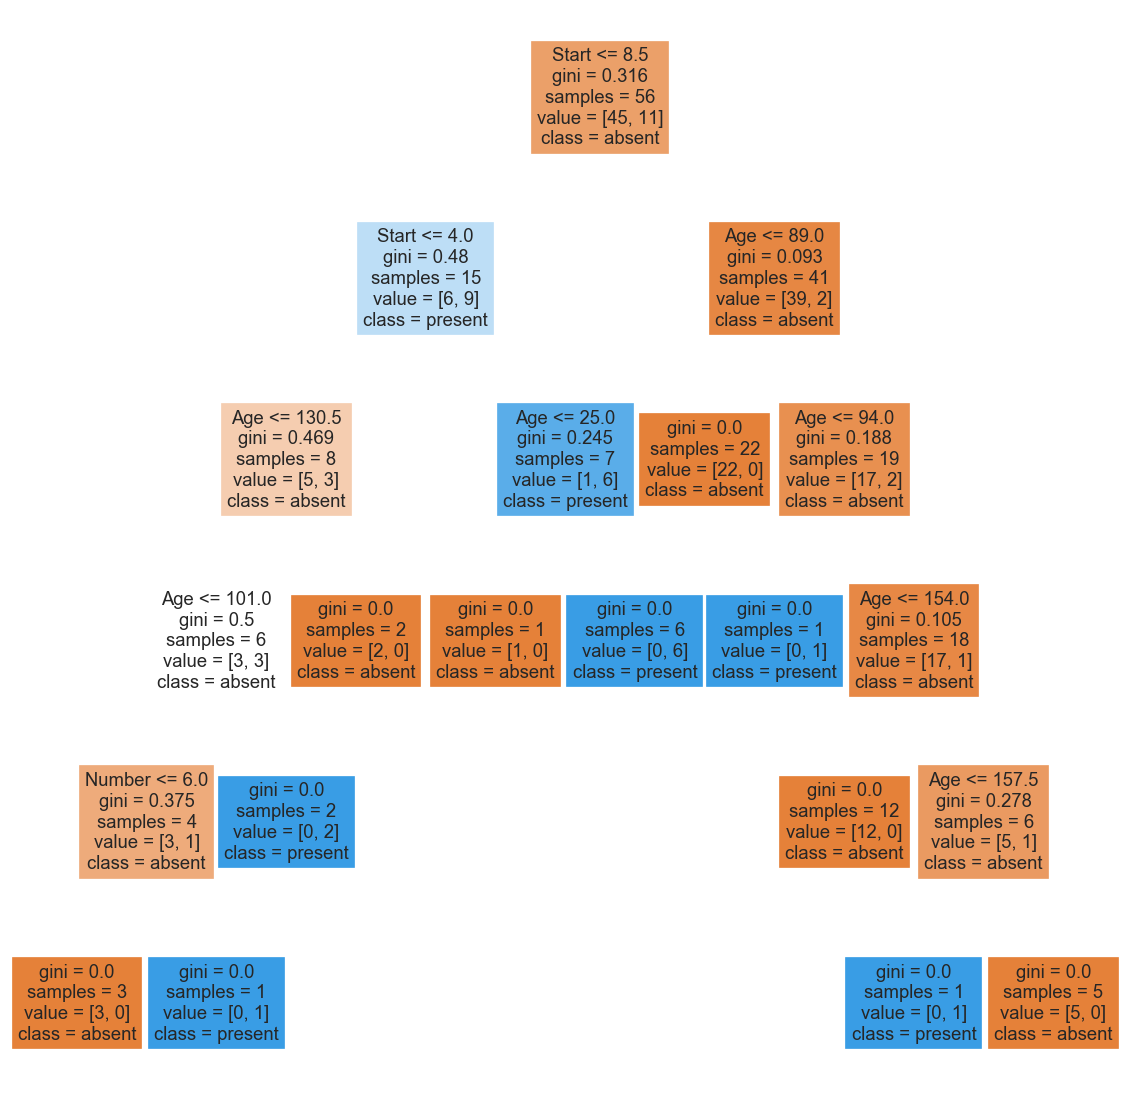

In [398]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(model,filled=True,feature_names=features ,class_names = targets)

In [399]:
from sklearn.ensemble import RandomForestClassifier

In [400]:
model = RandomForestClassifier(n_estimators=100)

In [401]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [402]:
y_pred = model.predict(X_test)

In [403]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [404]:
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 5,  1]])

In [405]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



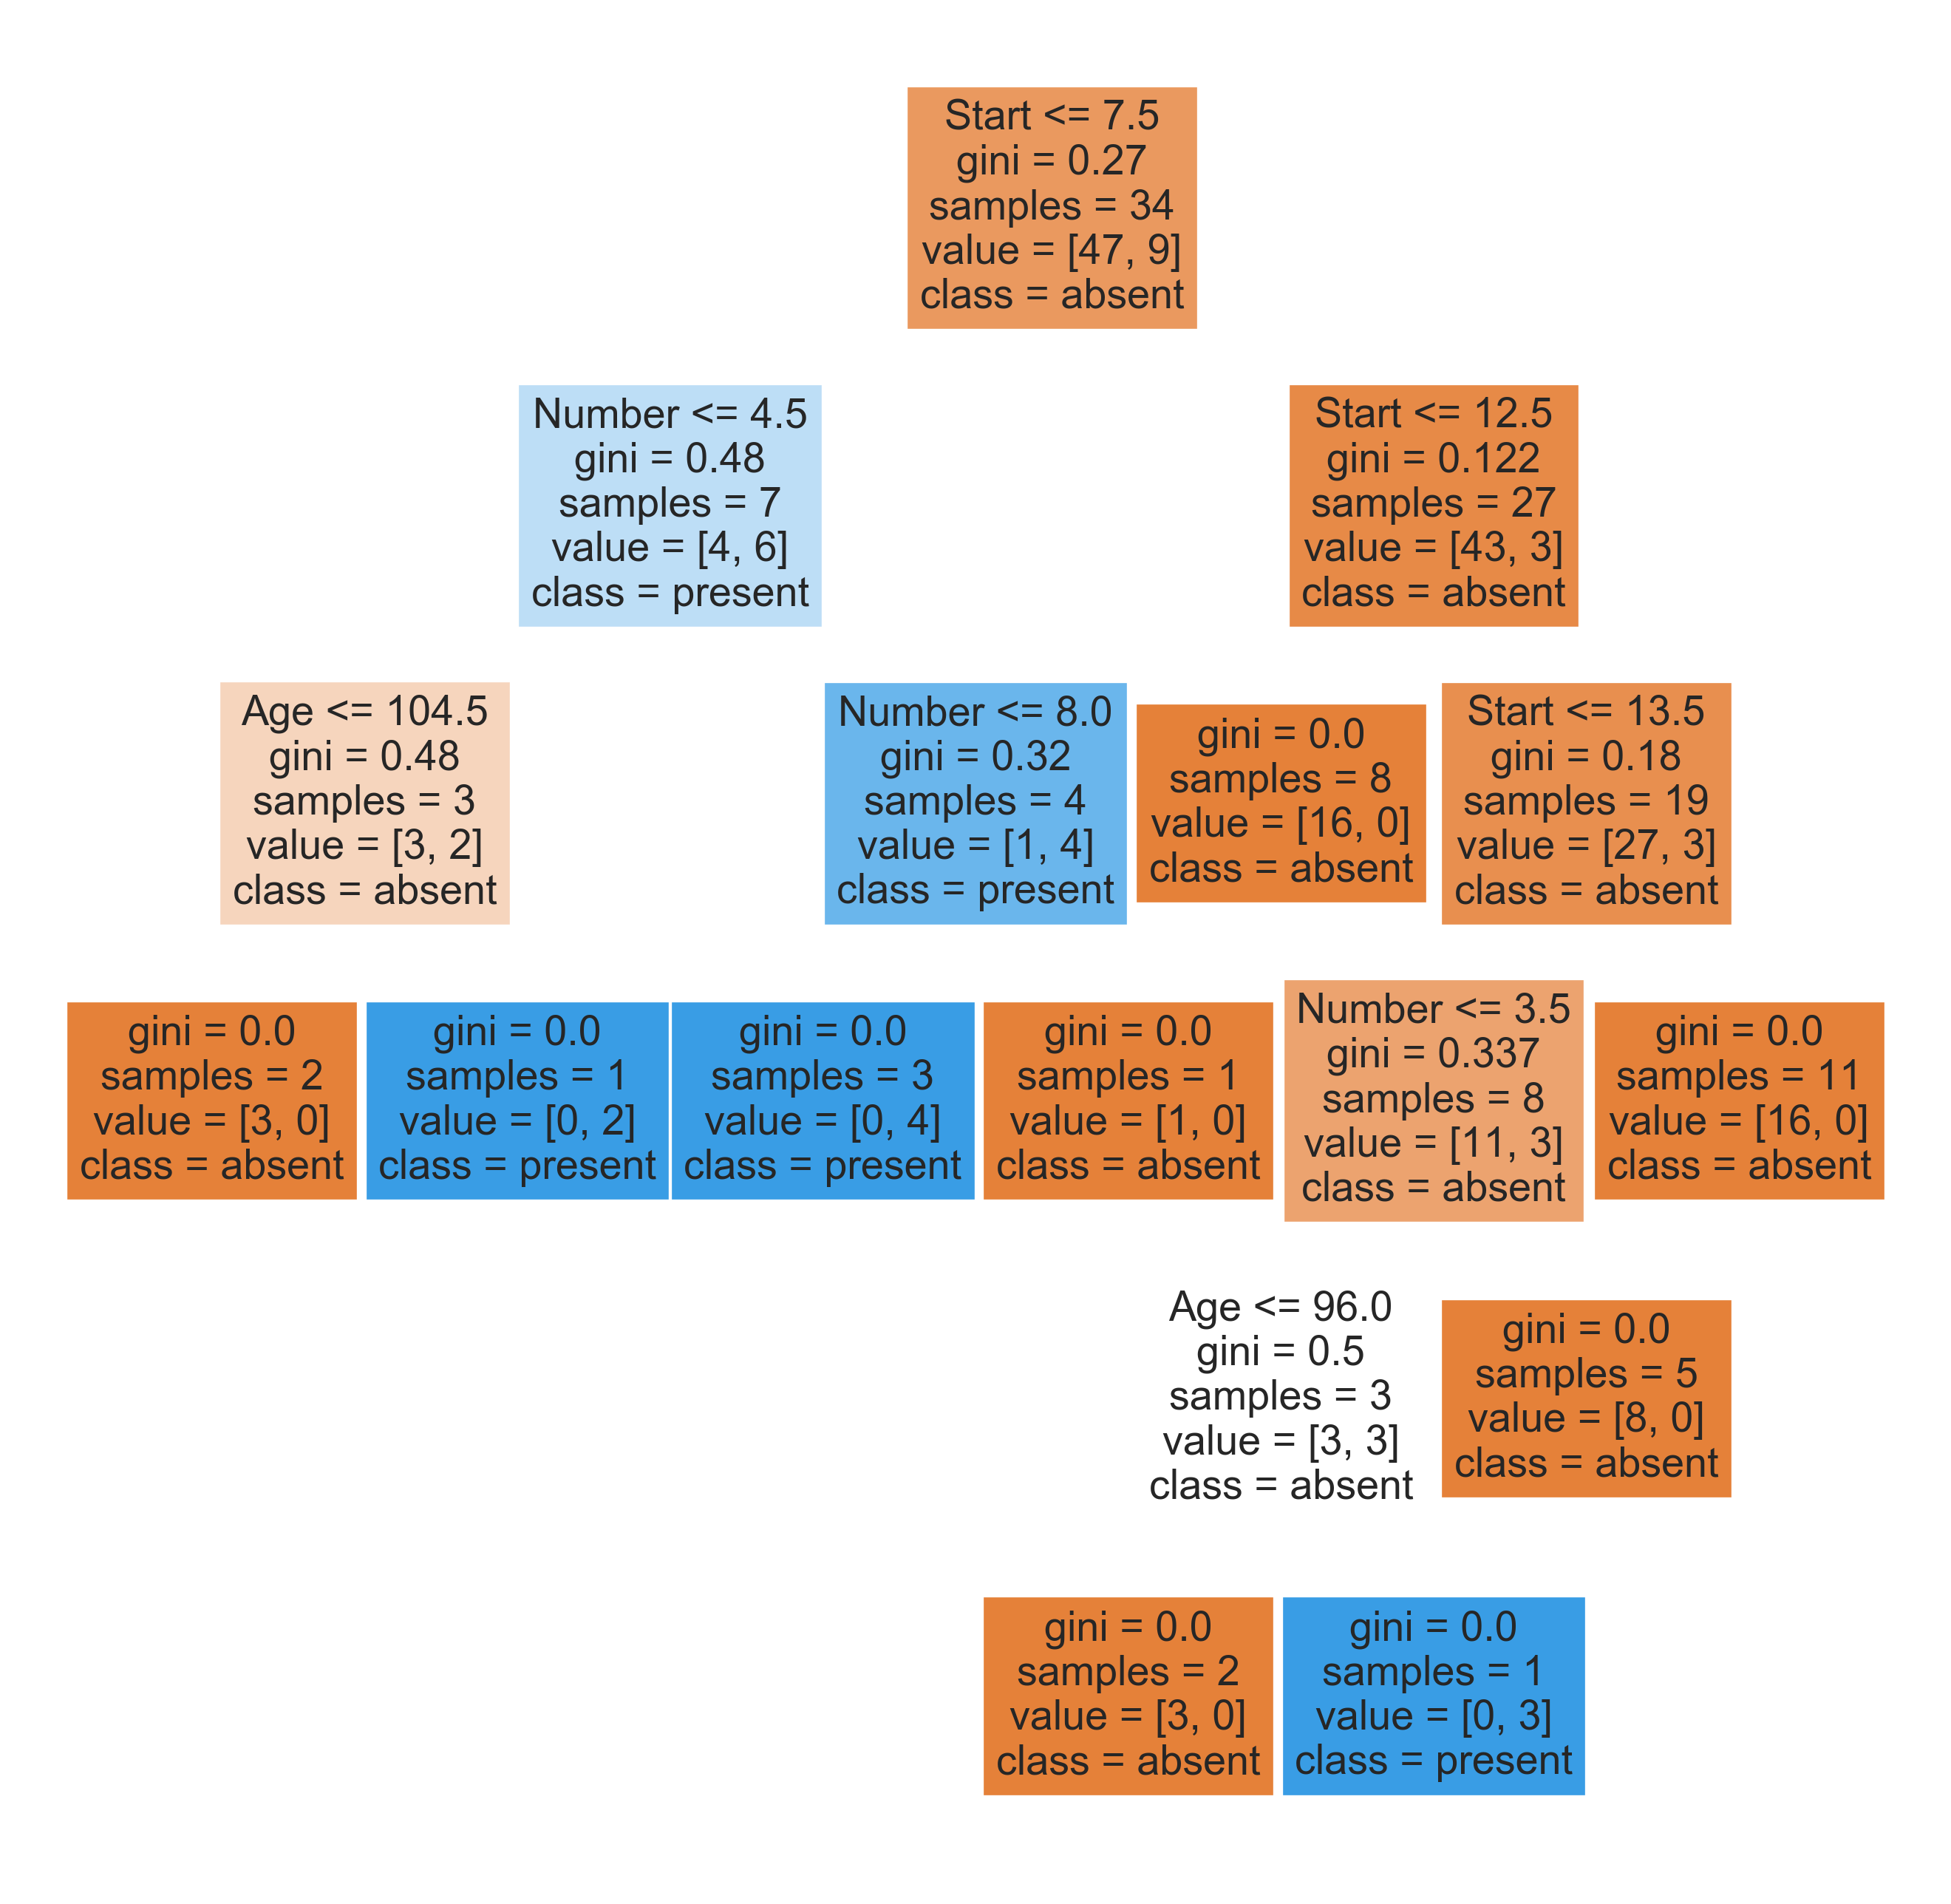

In [406]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);


In [407]:
from sklearn.ensemble import GradientBoostingClassifier

In [408]:
df_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_pro
0,6,148,72,35,0,33.6,0.627,50,1,1,0.676860
1,1,85,66,29,0,26.6,0.351,31,0,0,0.077176
2,8,183,64,0,0,23.3,0.672,32,1,1,0.885468
3,1,89,66,23,94,28.1,0.167,21,0,0,0.059584
4,0,137,40,35,168,43.1,2.288,33,1,1,0.993401
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.212718
764,2,122,70,27,0,36.8,0.340,27,0,0,0.286423
765,5,121,72,23,112,26.2,0.245,30,0,0,0.197174
766,1,126,60,0,0,30.1,0.349,47,1,0,0.250631


In [411]:
X = df_knn.drop(['Outcome'], axis=1)
y = df_knn['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [412]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [413]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [414]:
y_pred = dt_model.predict(X_test)

In [415]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72 22]
 [26 22]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        94
           1       0.50      0.46      0.48        48

    accuracy                           0.66       142
   macro avg       0.62      0.61      0.61       142
weighted avg       0.66      0.66      0.66       142



In [416]:
model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [417]:
y_pred = model.predict(X_test)

In [418]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 13]
 [24 24]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        94
           1       0.65      0.50      0.56        48

    accuracy                           0.74       142
   macro avg       0.71      0.68      0.69       142
weighted avg       0.73      0.74      0.73       142



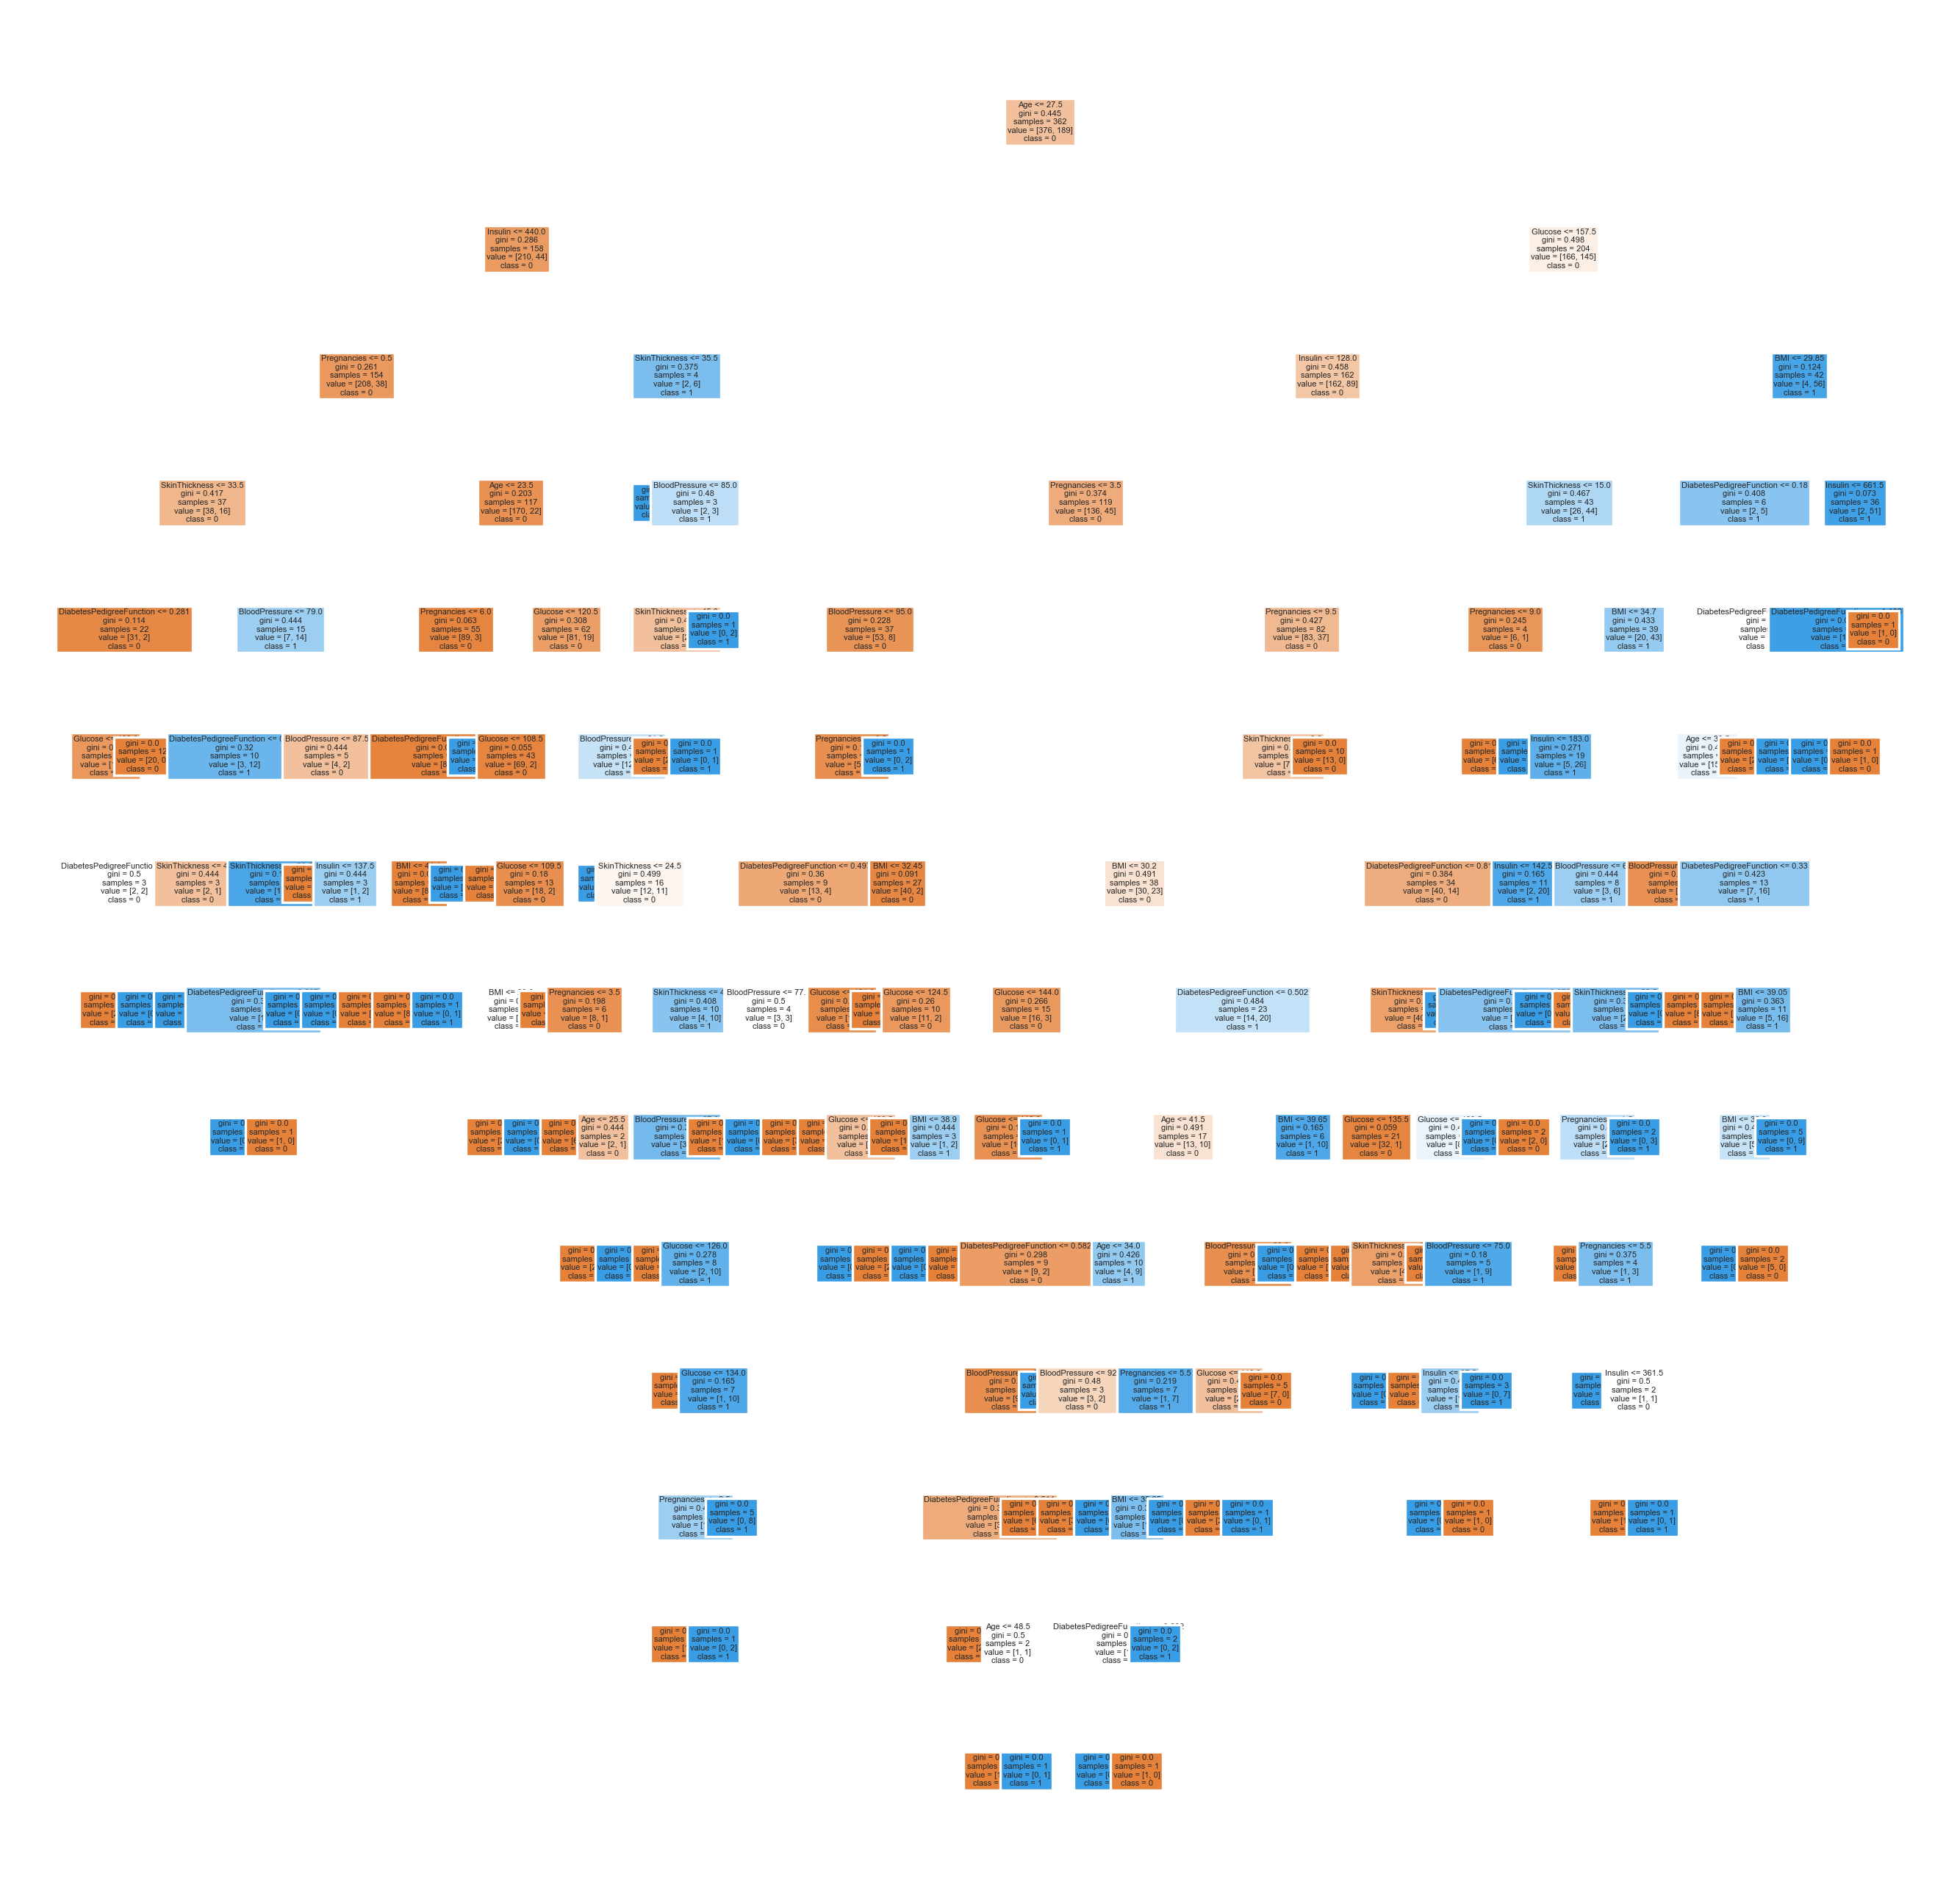

In [425]:
features = list(df_knn.columns[:len(df_knn.columns)-1])
targets = ["0","1"]
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);

In [422]:
df_knn.columns[:len(df_knn.columns)-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [426]:
df = pd.read_pickle('saved_df.pkl')

In [427]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


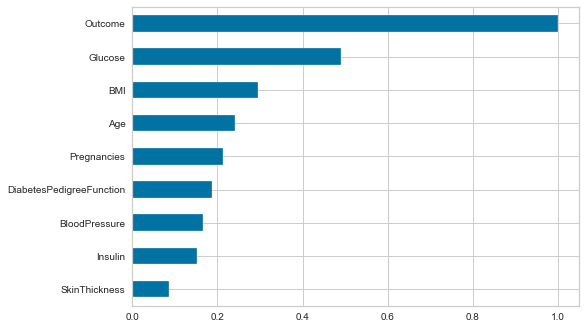

In [429]:
df.corr()['Outcome'].sort_values().plot.barh()

In [433]:
X = df.drop('Outcome',axis=1)
y=df['Outcome']

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [435]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 12]
 [19 29]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [442]:
sc = StandardScaler()

In [443]:
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train_s, y_train)
y_pred = knn_model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 11]
 [23 25]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



In [444]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74 20]
 [26 22]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        94
           1       0.52      0.46      0.49        48

    accuracy                           0.68       142
   macro avg       0.63      0.62      0.63       142
weighted avg       0.67      0.68      0.67       142



In [446]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 11]
 [22 26]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.70      0.54      0.61        48

    accuracy                           0.77       142
   macro avg       0.75      0.71      0.72       142
weighted avg       0.76      0.77      0.76       142



In [451]:
svc_model = SVC()
svc_model.fit(X_train_s, y_train)
y_pred = knn_model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 11]
 [23 25]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



In [452]:
rf = RandomForestClassifier()

In [453]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [454]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


In [455]:
rf_cv_model.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [457]:
rf_tuned = RandomForestClassifier(max_depth = 3,             
                                  max_features = 2, 
                                  min_samples_split = 2, 
                                  n_estimators = 100).fit(X_train, y_train)

In [458]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[89,  5],
       [27, 21]])

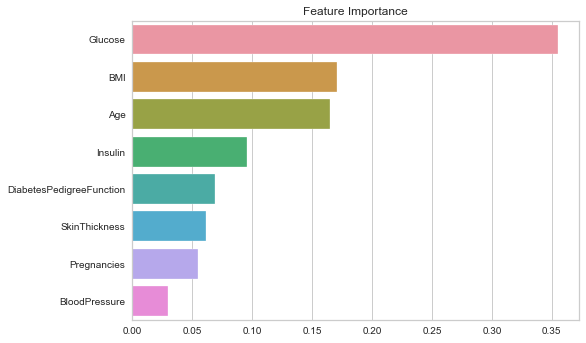

In [459]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [1]:

conda install -c conda-forge xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/aydin/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.9.2                |   py37hf985489_0         3.0 MB  conda-forge
    libxgboost-0.90            |       h6de7cb9_1         2.4 MB  conda-forge
    py-xgboost-0.90           

In [2]:
from xgboost import XGBClassifier